### Introduction:

- Goal is to learn how to effectively reduce the number of explanatory variables required for the intended model when the explanatory variables relatively large with respect to the number of observations contained within a data set. 
- Primary task is to apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear regression model that predicts the number of times an online news article will be shared

- This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. It has 39,797 observations and 61 attributes. 'shares' variable will serve as the response variable. We will select the explanatory variables using feature selection PCA technique. 

Steps:
1. We will load the data and do some EDA work to gain some insights from the dataset. 
2. Depending upon the information we learn from EDA work and also domain knowledge of the data, we will try to find key errors and pitfalls in the data which might create problem in futher model training.  
3. Transform data distributions via feature selection and dimensionality reduction to the 60 candidate explanatory variables to identify variables that you believe will prove to be relatively useful within the required linear regression model.
4. Train/cross validate model and report on its performance.
5. Conclusion. 

In [1]:
# load the pandas and numpy libraries
import pandas as pd
import numpy as np 

# importing dataset from github. This data set contains information related to articles published by Mashable. 
filename = "https://raw.githubusercontent.com/getfitwithapurv/datascience/main/M4_Data.csv"
data = pd.read_csv(filename)
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
data.info() # checking datatype and null values of data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [3]:
data # sanity check

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


 ### Exploratory Data Analysis

In [4]:
data.isna().sum() # check for missing values

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

In [5]:
data.describe() # Check the statistical information for the dataset

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


We will divide these columns/attributes into groups based upon the data and domain available

In [6]:
urltd = data.iloc[:,0:2]
num_of_content = data.iloc[:,2:13]
data_channel = data.iloc[:,13:19]
keywords = data.iloc[:,19:31]
day_of_publish = data.iloc[:,31:39]
LDA_proximity = data.iloc[:,39:44]
sentiment = data.iloc[:,44:60]
shares =  data.iloc[:,60]
shares = pd.DataFrame(shares)

In [7]:
sentiment # sanity check 

,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,0.358578,-0.008066,0.020528,0.023460,0.466667,0.533333,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [8]:
shares # response variable 

,shares
0,593
1,711
2,1500
3,1200
4,505
...,...
39639,1800
39640,1900
39641,1900
39642,1100


- Numeric variables = num_of_content + keywords + sentiment 
- Categorical variables = data_channel + day_of_publish + LDA_proximity 
- Response variable = shares

First, we will plot and try to analyze and gather information about 'Numeric variables' 

In [9]:
# importing seaborn and matplotlib pyplot libraries 
import seaborn as sns
import matplotlib.pyplot as plt

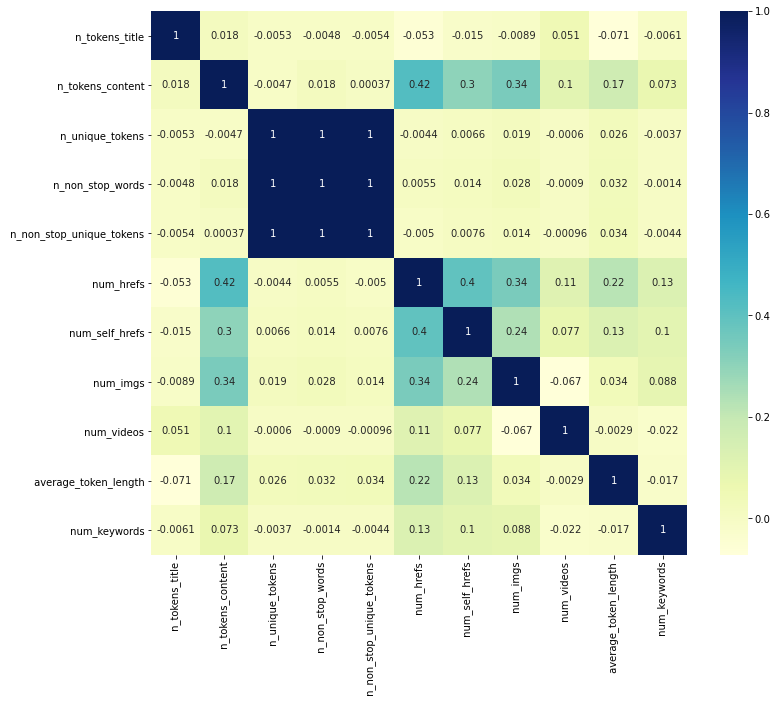

In [10]:
plt.figure(figsize=(12,10))
corr = num_of_content.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the num_of_content columns

From the heatmap above it can observed that there is highest correlation between n_unique_tokens, n_non_stop_words, n_non_stop_unique_tokens. 

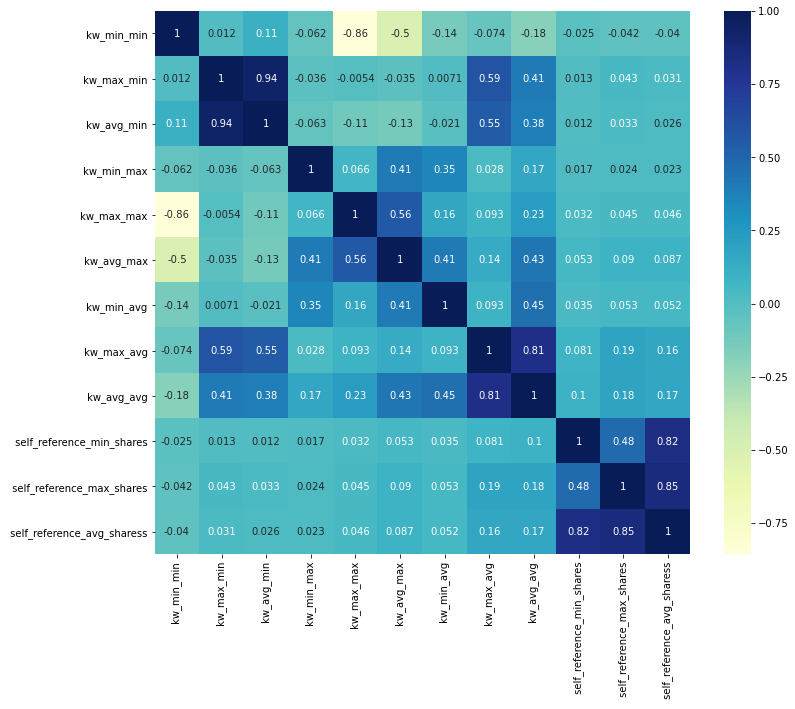

In [11]:
plt.figure(figsize=(12,10))
corr = keywords.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the keywords columns

From heatmap above it is observed that there is a high correlation between kw_max_min, kw_avg_min, and self_reference_max_shares, self_reference_avg_sharess

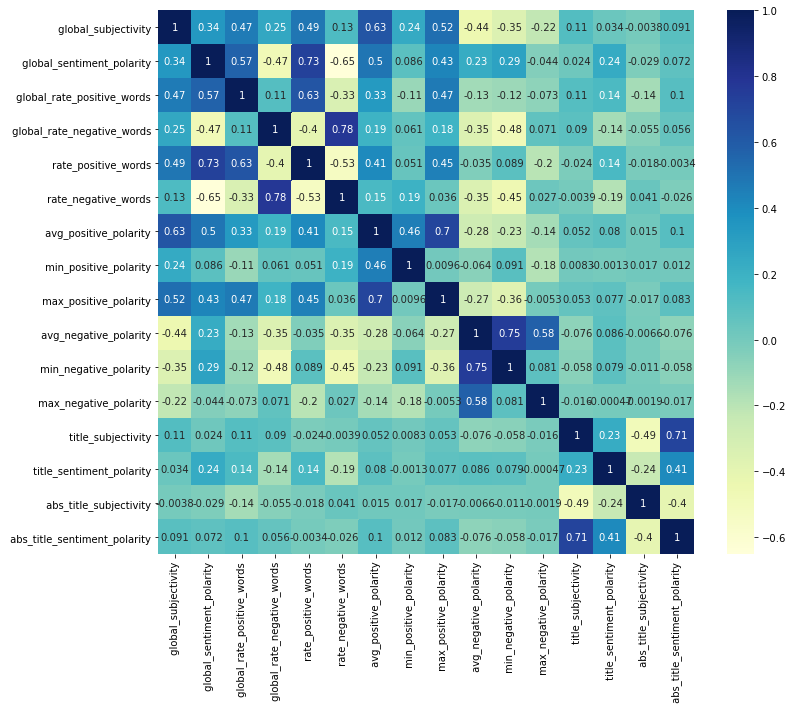

In [12]:
plt.figure(figsize=(12,10))
corr = sentiment.corr()
sns.heatmap(corr, cmap="YlGnBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()
# Plotting heatmap to see correlation bewteen the sentiment columns

here compared to num_of_contents and keywords which were highly coorelated having absolute value above 0.93, ones which are highly correlated has absolute value below 0.8

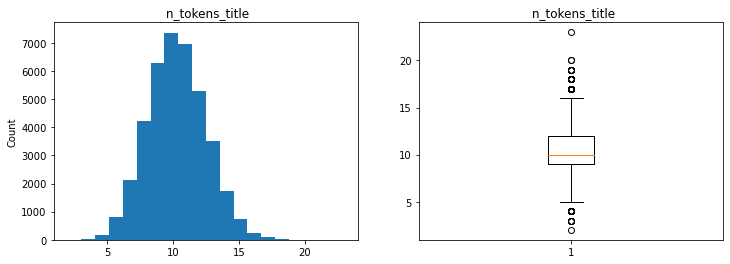

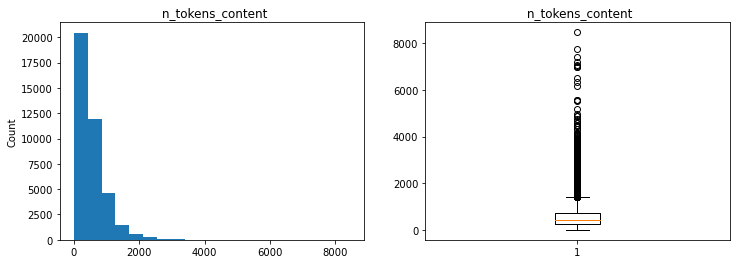

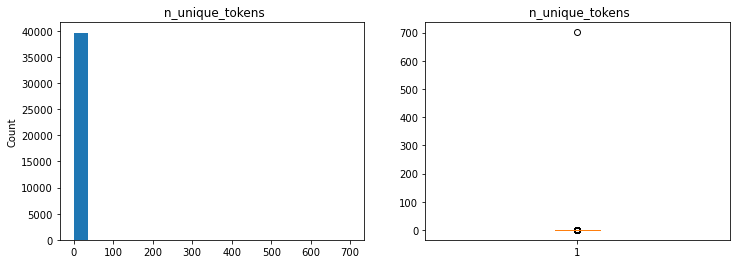

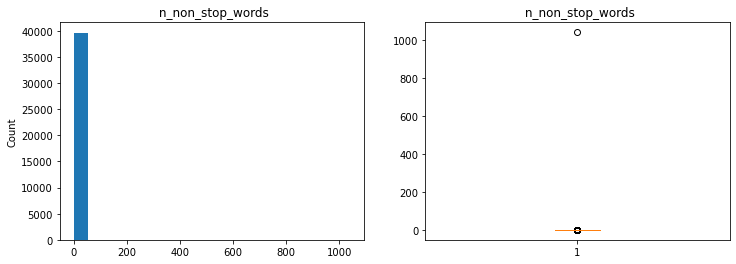

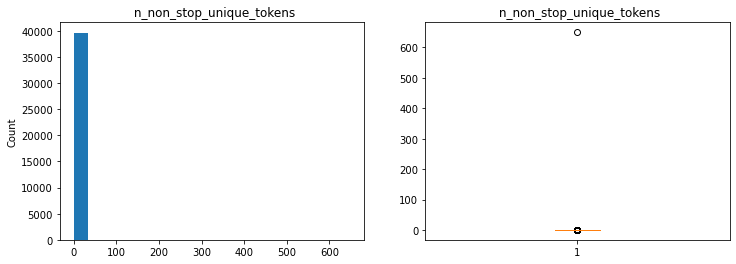

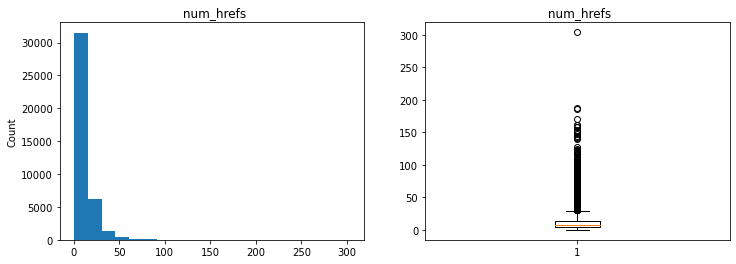

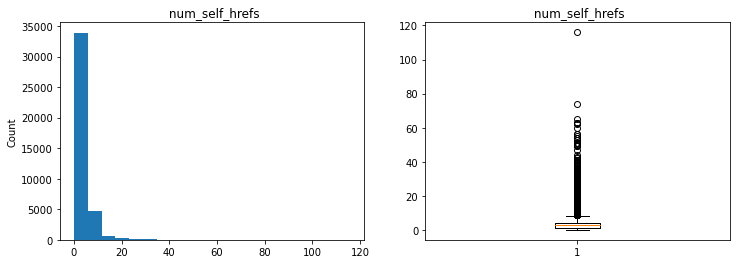

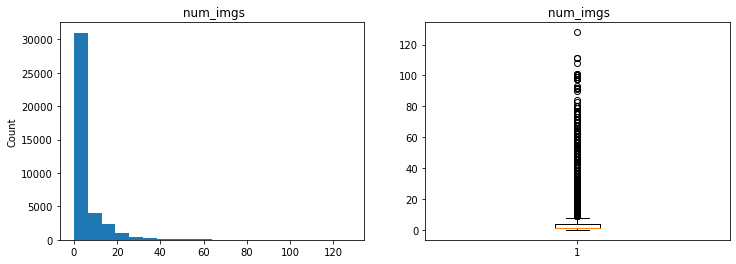

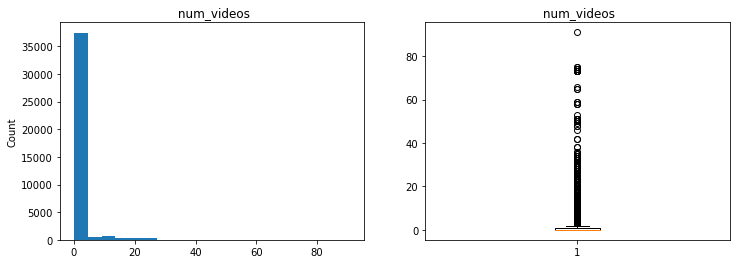

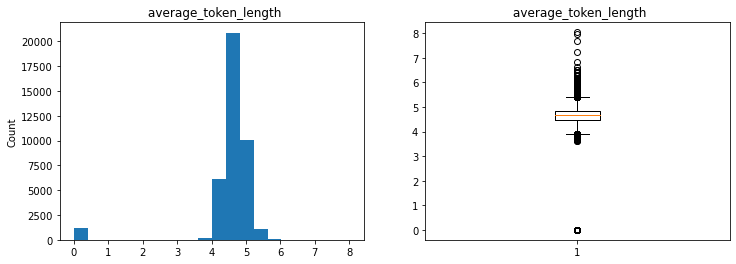

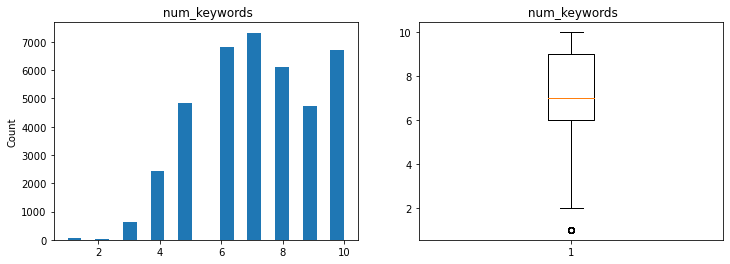

In [13]:
# for each column, create a histogram and boxplot side by side 
# for num_of_content columns 
for i in range(0,11):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=num_of_content.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(num_of_content.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(num_of_content.columns[i])
    plt.show()

we can see here that n_tokens_title is binomial distribution, others are moslty right skewed which need to be normalized.

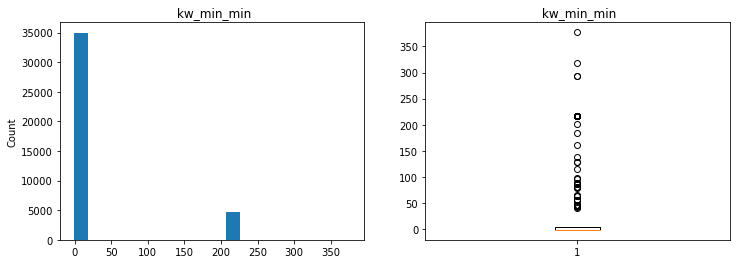

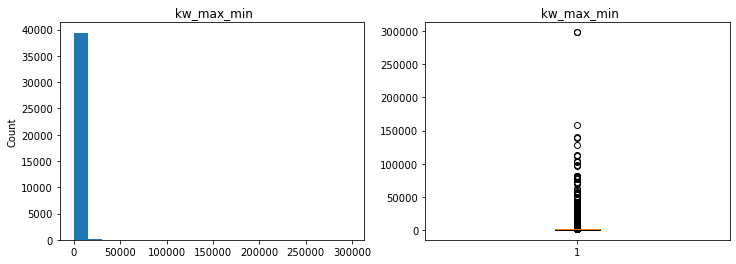

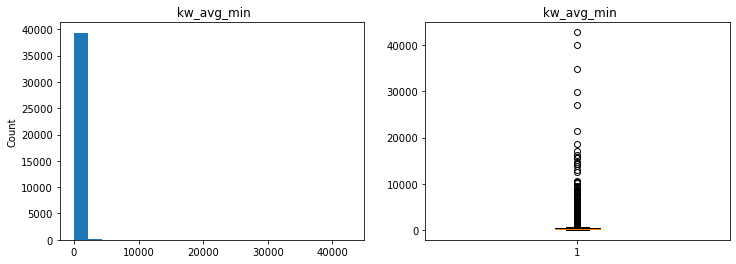

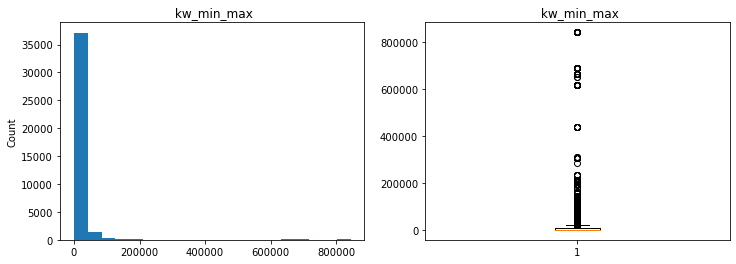

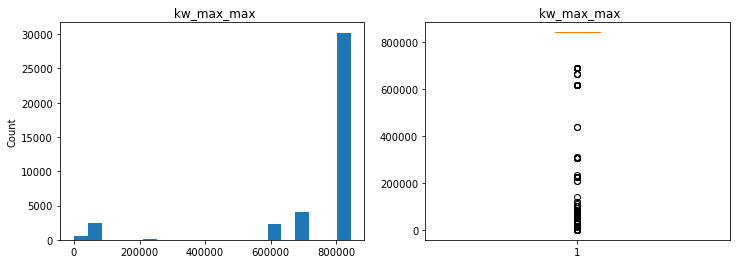

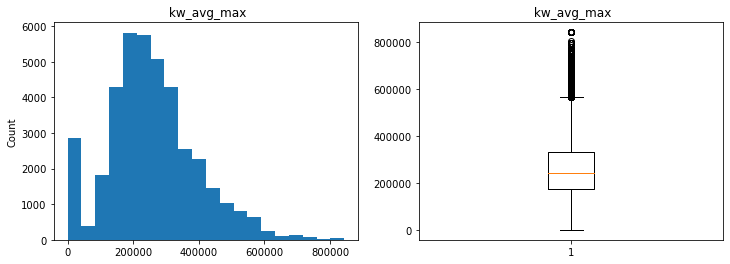

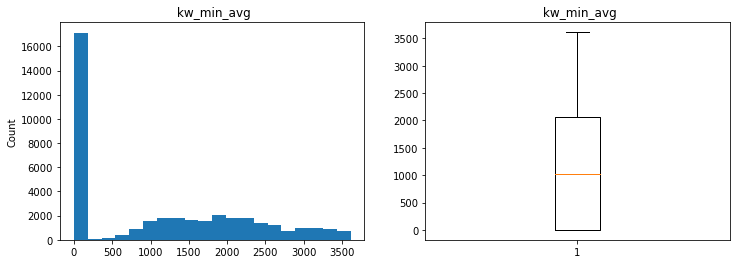

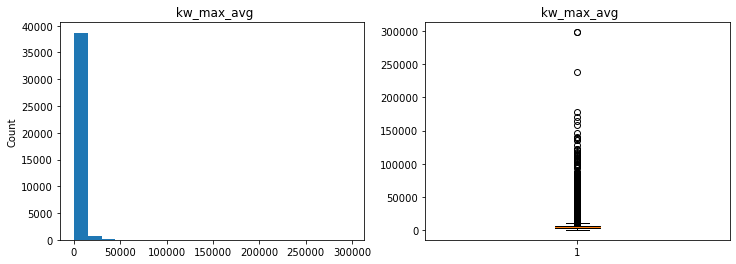

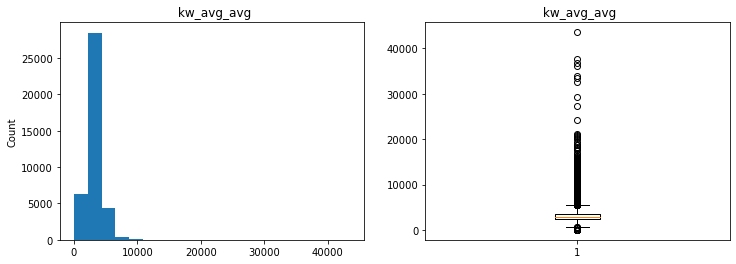

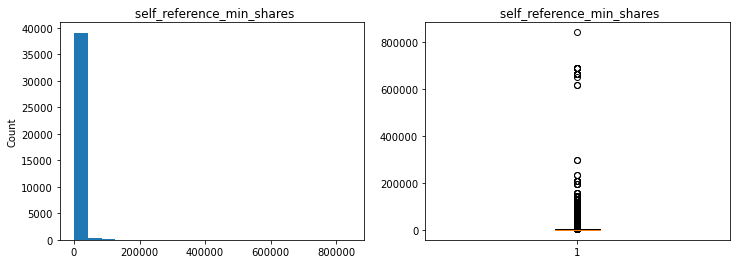

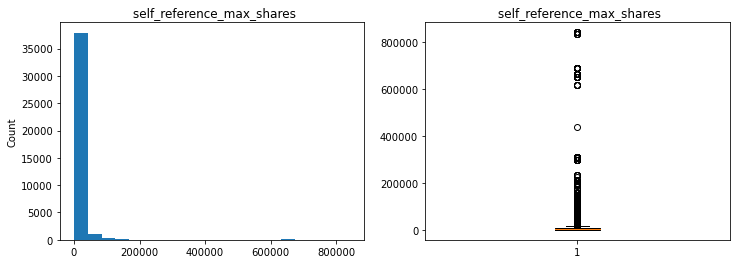

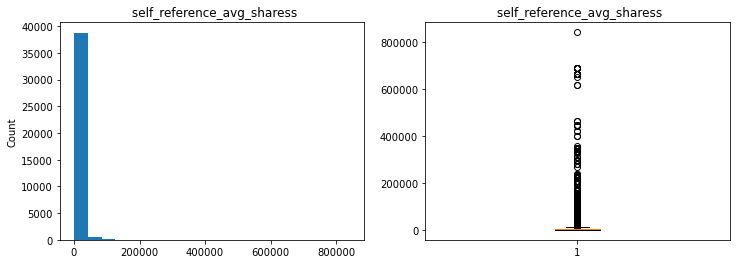

In [14]:
# for each column, create a histogram and boxplot side by side
# for keywords columns
for i in range(0,12):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=keywords.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(keywords.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(keywords.columns[i])
    plt.show()

In keywords too, we see that almost all columns are rightly skewed except kw_max_max which is left skewed with outliers. 

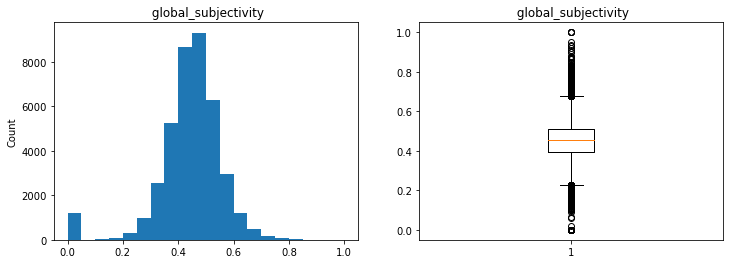

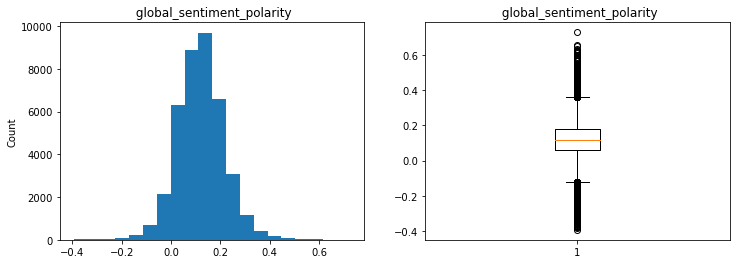

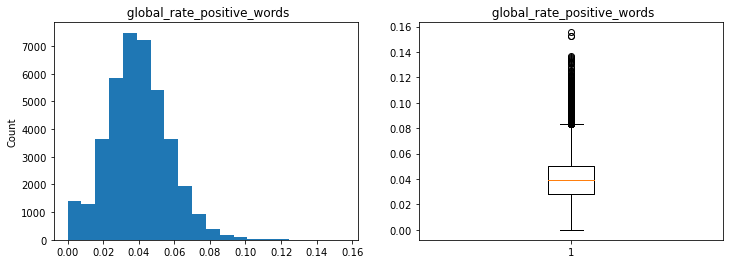

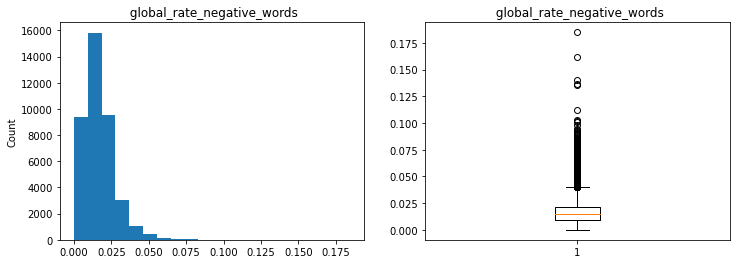

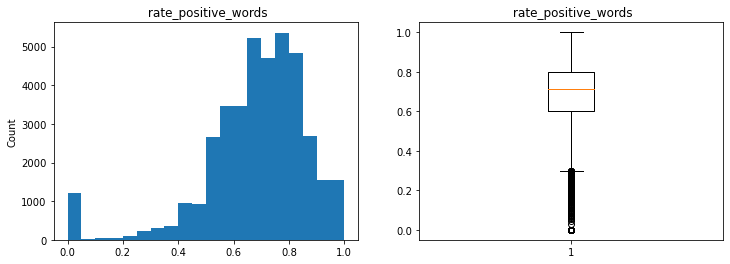

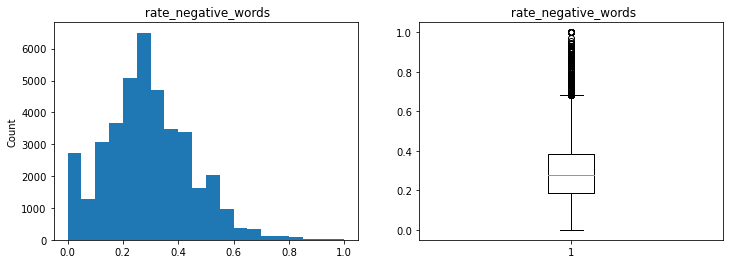

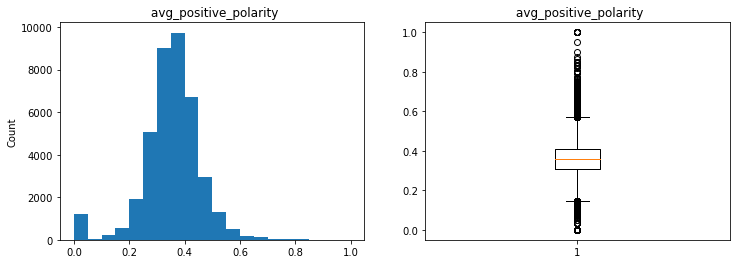

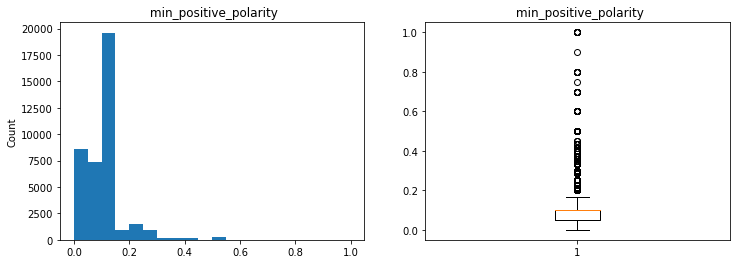

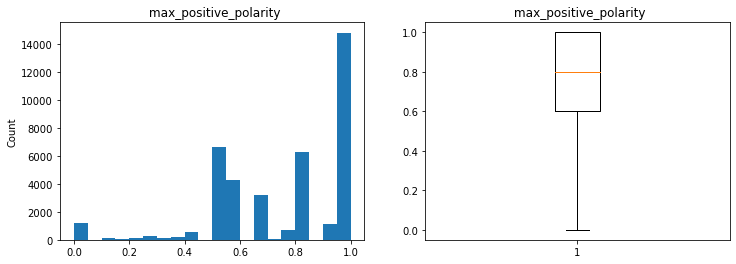

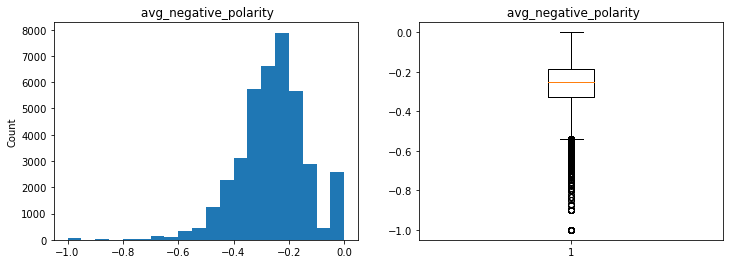

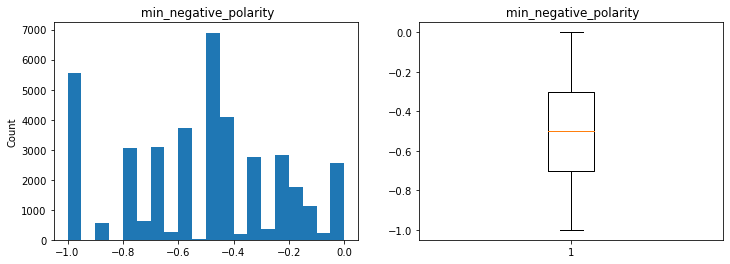

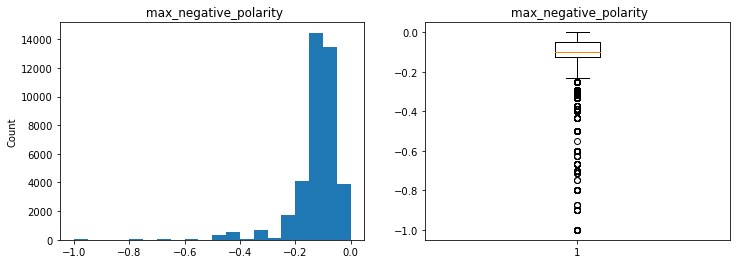

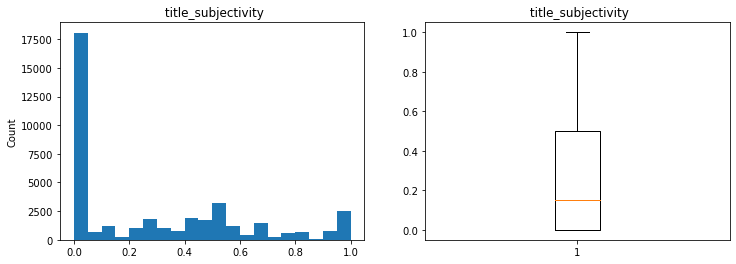

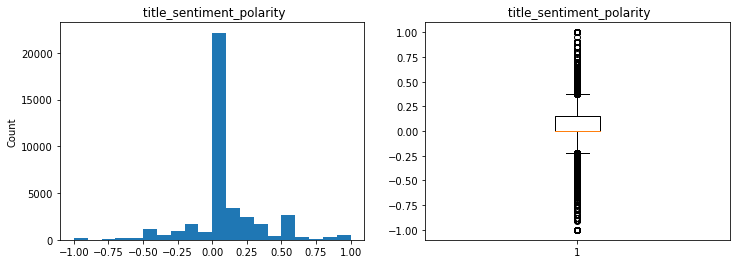

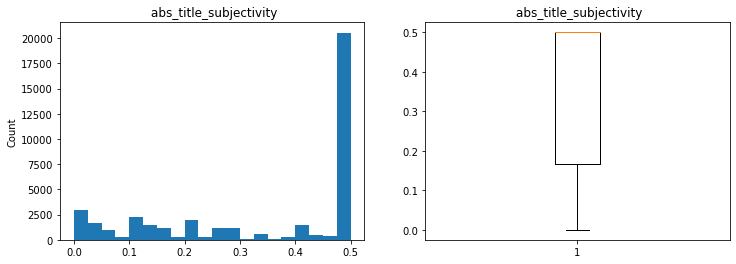

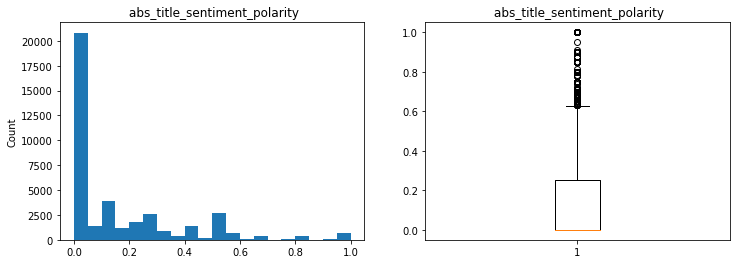

In [15]:
# for each column, create a histogram and boxplot side by side
# for sentiment columns 
for i in range(0,16):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=sentiment.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(sentiment.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(sentiment.columns[i])
    plt.show()

For sentiment columns inital columns are normally distributed whereas and later columns need to be normalized.

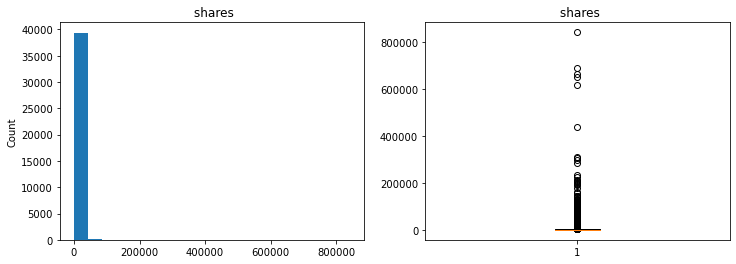

In [16]:
# for each column, create a histogram and boxplot side by side
# for Shares column 
for i in range(0,1):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=shares.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(shares.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(shares.columns[i])
    plt.show()

From the graph above it is evident that shares is rightly skewed with some outliers in the right. 

In [17]:
#dividing the column names into lists for further use
num_of_content1 = list(data.columns)[2:13]
data_channel1 = list(data.columns)[13:19]
keywords1 = list(data.columns)[19:31]
day_of_publish1 = list(data.columns)[31:39]
LDA_proximity1 = list(data.columns)[39:44]
sentiment1 = list(data.columns)[44:60]
shares1 =  list(data.columns)[60]

In [18]:
num_of_content1 #sanity check 

[' n_tokens_title',
 ' n_tokens_content',
 ' n_unique_tokens',
 ' n_non_stop_words',
 ' n_non_stop_unique_tokens',
 ' num_hrefs',
 ' num_self_hrefs',
 ' num_imgs',
 ' num_videos',
 ' average_token_length',
 ' num_keywords']

<AxesSubplot:>

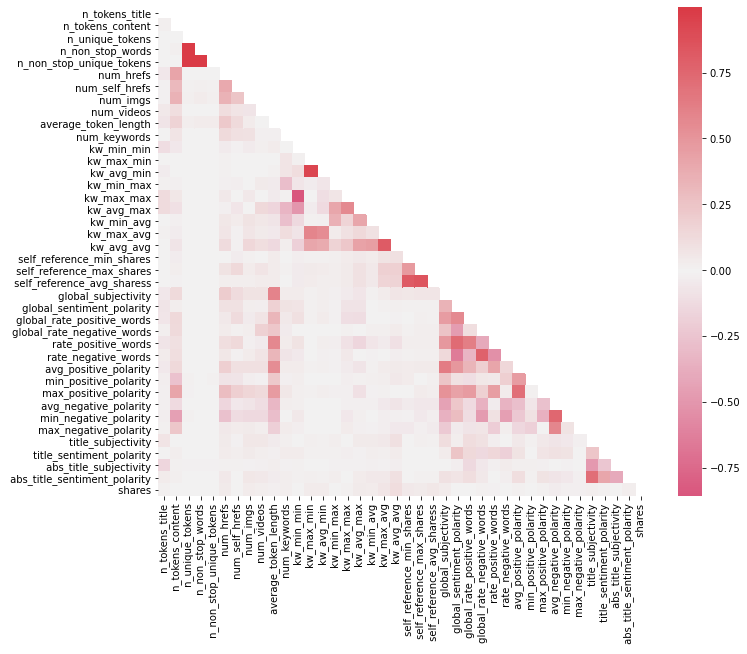

In [19]:
# Coorelation graph of num_of content + sentiment + keyword with response variable(shares)
corr = data[num_of_content1 + keywords1 + sentiment1 +[shares1]].corr() #using lists created above 
mask = np.triu(np.ones_like(corr, dtype = bool))
fig, axes = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(0, 10, as_cmap = True)
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0, square = True)

We can observe from above plot that shares which is response variable is not correlated to any other variables as such. 

Now we will plot and try to analyze and gather information about 'Categorical variables' 

In [20]:
# defining a function to plot categorical variables 
def cat_plot(df, col, rotate = False):
    plt.figure(figsize = (6,4))
    if rotate:
        plt.xticks(rotation = 75)
    plt.title('Count of ' + col.strip())
    sns.countplot(x = col, data = df)
    plt.tight_layout()
    plt.show()

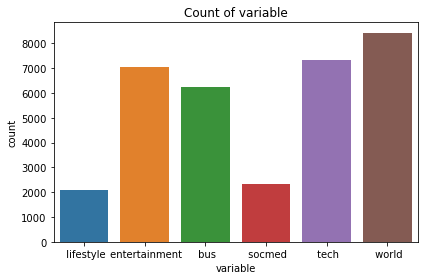

In [21]:
#using melt function to divide the categories of 'data_channel' columns 
melt_frame = pd.melt(data_channel)
melt_frame.variable = melt_frame.variable.str.replace("data_channel_is_", "")
cat_plot(melt_frame[melt_frame.value == 1], 'variable')

It is observed that lifestyle and social media has less articles compared to entertainment, business, tech and world.

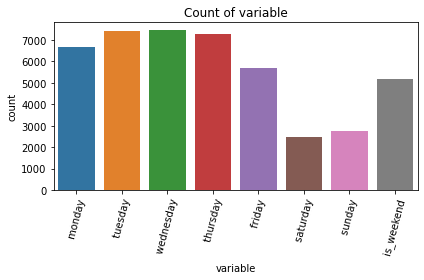

In [22]:
#using melt function to divide the categories of 'day_of_publish columns 
melt_frame = pd.melt(day_of_publish)
melt_frame.variable = melt_frame.variable.str.replace("weekday_is_", "")
cat_plot(melt_frame[melt_frame.value == 1], 'variable', True)

It is observed that fewer articles are published on saturday and sunday.

In [23]:
LDA_proximity #sanity check 

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
0,0.500331,0.378279,0.040005,0.041263,0.040123
1,0.799756,0.050047,0.050096,0.050101,0.050001
2,0.217792,0.033334,0.033351,0.033334,0.682188
3,0.028573,0.419300,0.494651,0.028905,0.028572
4,0.028633,0.028794,0.028575,0.028572,0.885427
...,...,...,...,...,...
39639,0.025038,0.025001,0.151701,0.025000,0.773260
39640,0.029349,0.028575,0.231866,0.681635,0.028575
39641,0.159004,0.025025,0.025207,0.643794,0.146970
39642,0.040004,0.040003,0.839987,0.040002,0.040004


In [24]:
# convert values for LDA proximity to 0 and 1 since we want to categorize it 
# above 0.5 is converted to 1 and below 0.5 is converted to 0

for i in LDA_proximity.index:
    vector1 = LDA_proximity.iloc[i]
    vector2 = np.array(vector1)
    for j in range(len(vector1)):
        if vector1[j] == max(vector1):
            vector2[j] = 1
        else:
            vector2[j] = 0
    
    LDA_proximity.at[i] = vector2

LDA_proximity #sanity check 

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0
39640,0.0,0.0,0.0,1.0,0.0
39641,0.0,0.0,0.0,1.0,0.0
39642,0.0,0.0,1.0,0.0,0.0


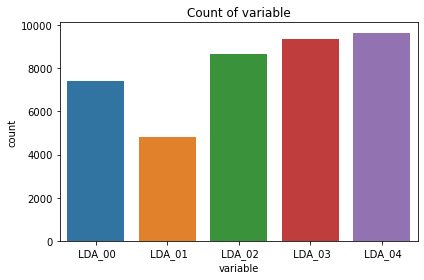

In [25]:
melt_frame = pd.melt(LDA_proximity)
cat_plot(melt_frame[melt_frame.value == 1], 'variable')

##### Now we will normalize the numeric variable values

In [26]:
numericsc= num_of_content1 + keywords1 + sentiment1 + [shares1] 

In [27]:
# importing power_transform for normalization
from sklearn.preprocessing import power_transform
standardized_data = pd.DataFrame(power_transform(data[numericsc]), columns = numericsc)
standardized_data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.768359,-0.720956,0.861365,0.165674,0.781136,-0.693423,-0.149019,-0.290008,-0.749604,0.022536,...,0.340736,-0.430519,-0.741268,-0.295958,-1.325929,0.929000,-0.981993,-1.539498,0.714262,-1.294643
1,-0.644399,-0.582079,0.511983,0.165674,0.664751,-0.957425,-0.740154,-0.290008,-0.749604,0.677491,...,-1.210459,-0.430519,1.128380,1.395032,-0.188209,-0.988237,-0.241250,0.885498,-0.885549,-1.038424
2,-0.644399,-0.753699,0.330606,0.165674,-0.000646,-0.957425,-0.740154,-0.290008,-0.749604,-0.669620,...,0.340736,1.111049,-1.559161,-0.958965,-0.654181,-0.988237,-0.241250,0.885498,-0.885549,-0.084913
3,-0.644399,0.213271,-0.122812,0.165674,0.008904,0.153481,-1.767673,-0.290008,-0.749604,-0.644056,...,0.903776,0.014270,-0.884501,-0.295958,-1.026510,-0.988237,-0.241250,0.885498,-0.885549,-0.353806
4,1.216605,1.214913,-0.718135,0.165674,-0.691796,1.042550,2.522405,1.660464,-0.749604,0.029020,...,-1.210459,1.111049,0.261996,0.045235,0.749035,0.829896,0.274592,-1.437283,0.423477,-1.530034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.309590,-0.277999,0.040511,0.165674,0.111594,0.153481,1.251290,-0.290008,1.062406,-0.371357,...,0.340736,-0.216161,-0.057273,0.045235,-0.547410,-0.395733,-0.241250,0.110133,-0.885549,0.125248
39640,0.768359,-0.333828,1.049465,0.165674,1.118071,0.153481,1.251290,0.558841,1.944837,-0.642740,...,0.903776,-0.430519,0.336380,0.393643,-0.188209,0.414200,3.219244,-0.950557,1.821954,0.185976
39641,-0.160861,-0.007013,-0.041182,0.165674,-0.107914,1.338081,-0.740154,1.436243,1.062406,1.189318,...,0.903776,-1.141007,-0.788337,-0.958965,-1.026510,0.829896,0.274592,-1.437283,0.423477,0.185976
39642,-2.193336,0.539768,0.107113,0.165674,0.153491,0.273184,-0.740154,-0.290008,-0.749604,0.864498,...,-0.430438,-1.141007,0.384740,0.045235,1.711668,-0.988237,-0.241250,0.885498,-0.885549,-0.462264


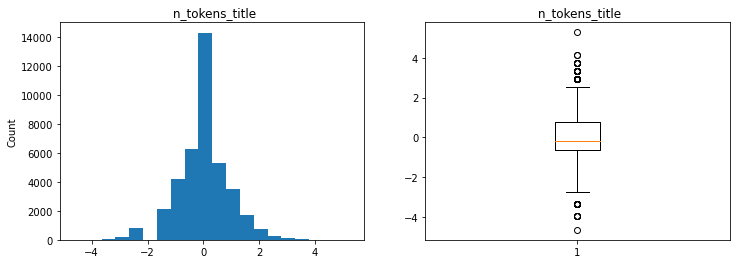

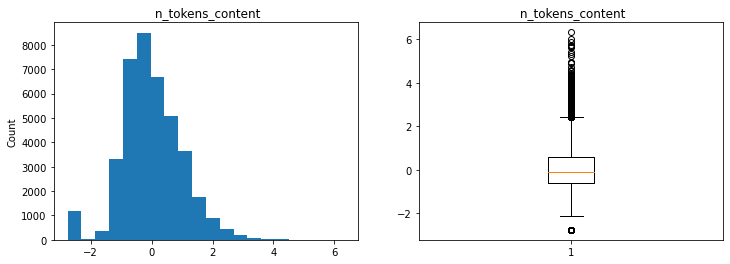

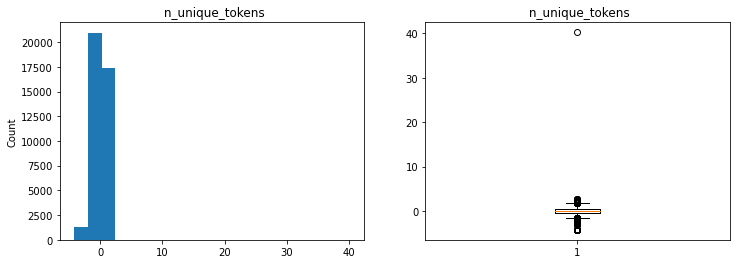

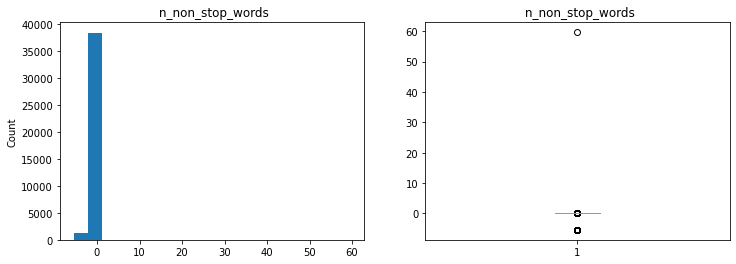

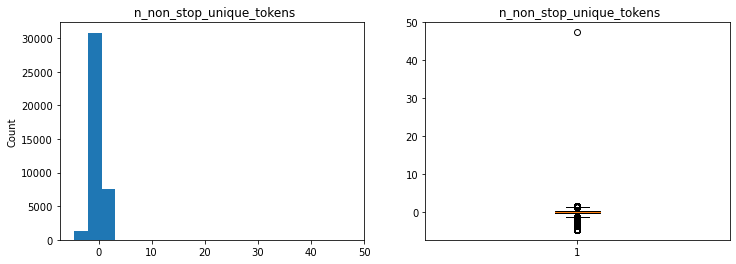

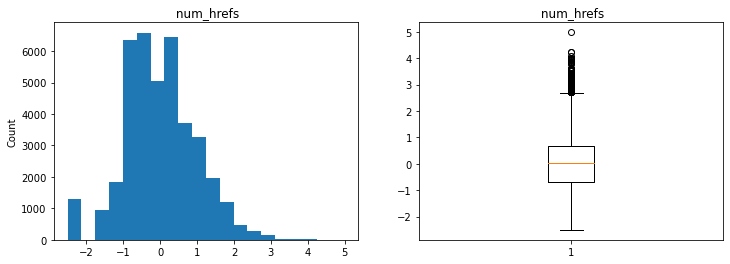

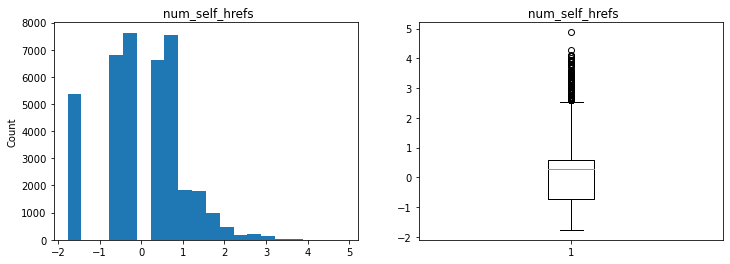

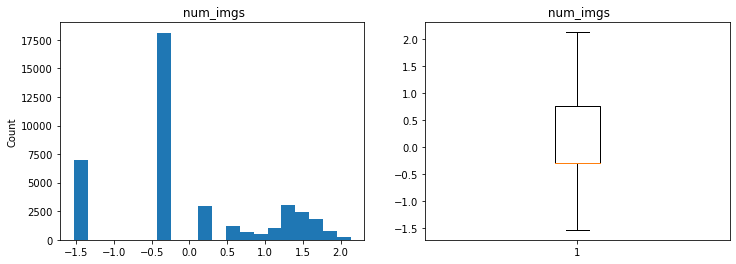

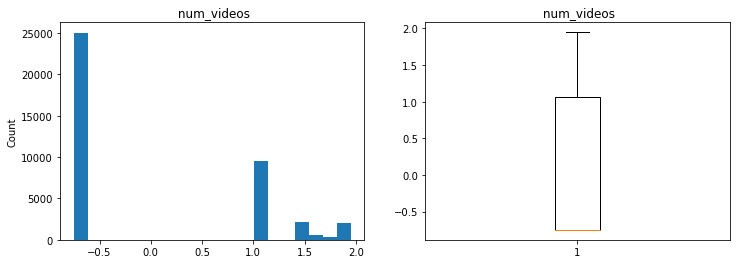

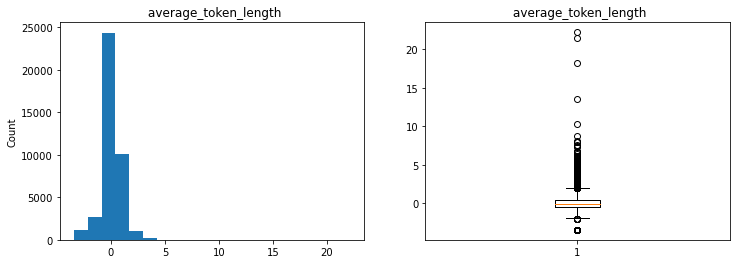

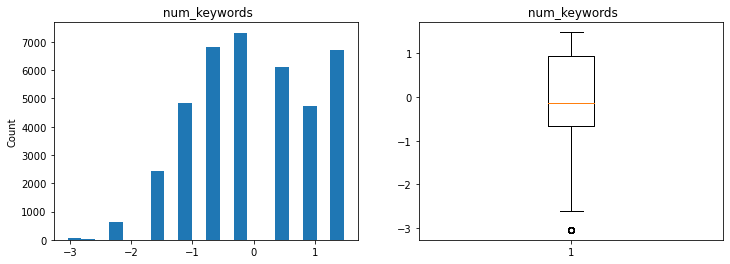

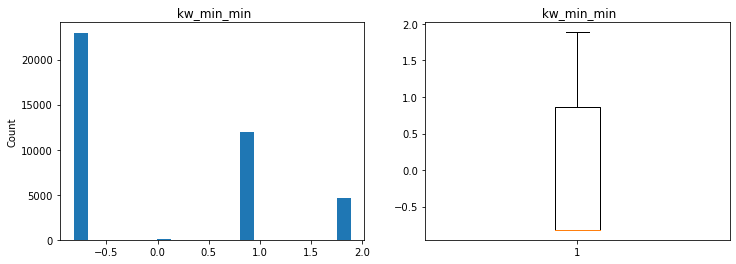

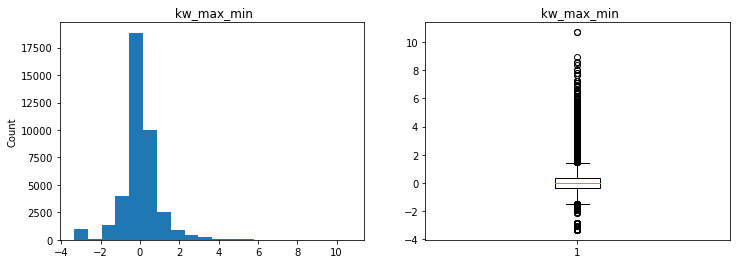

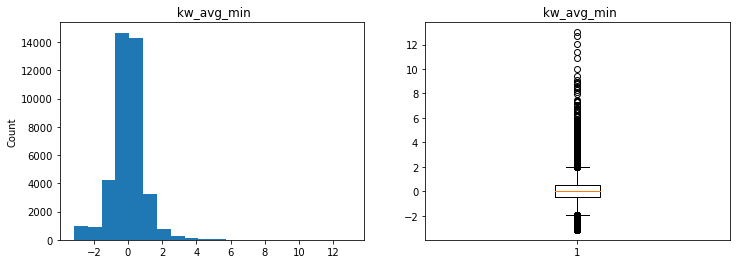

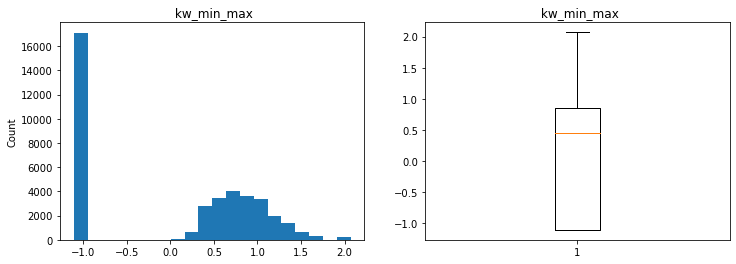

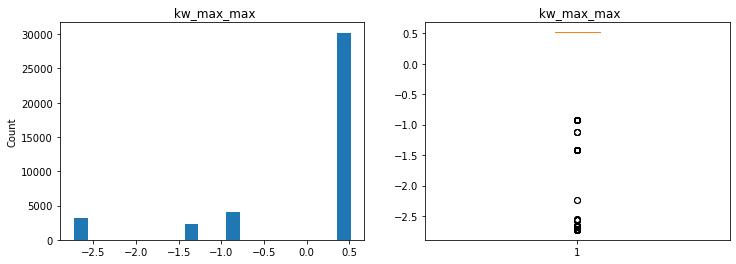

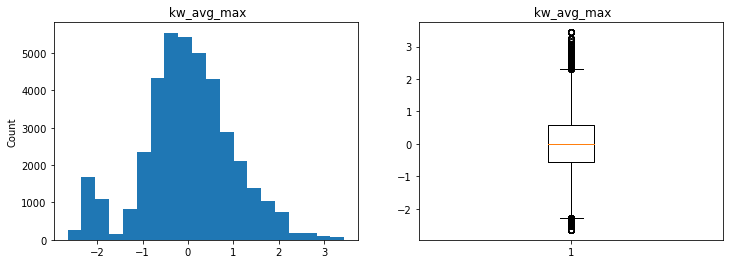

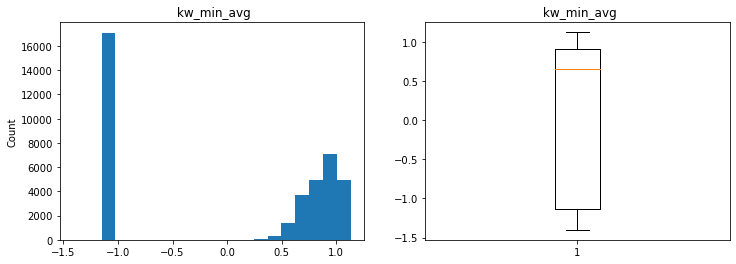

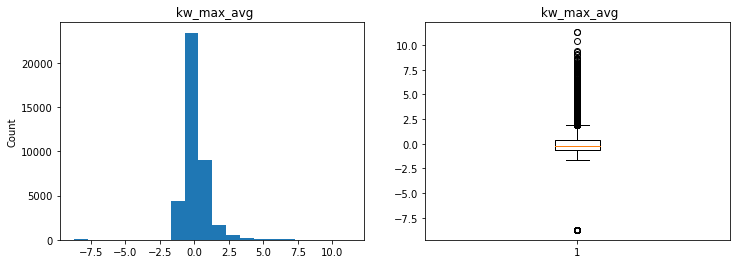

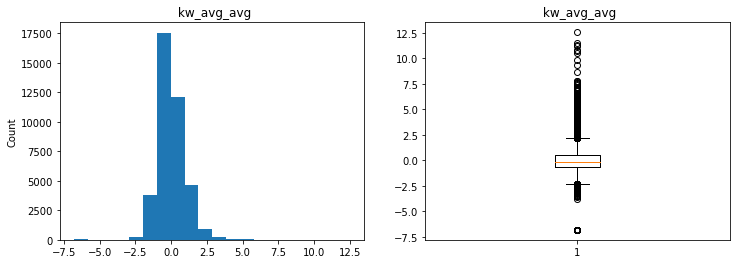

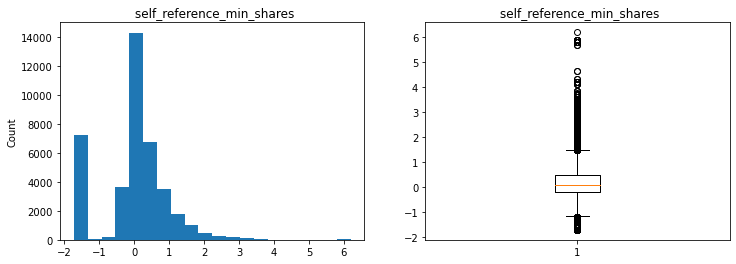

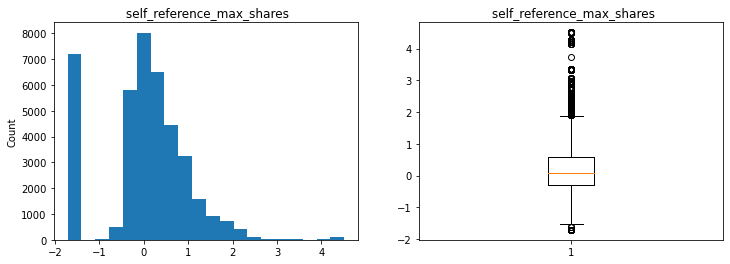

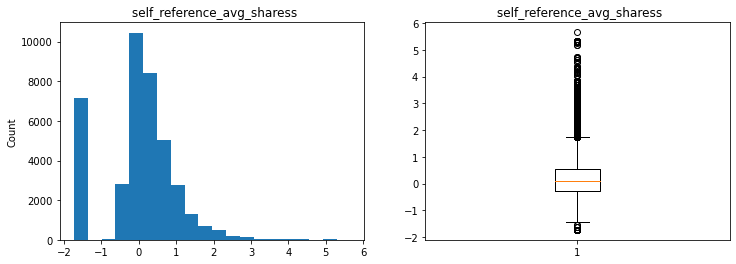

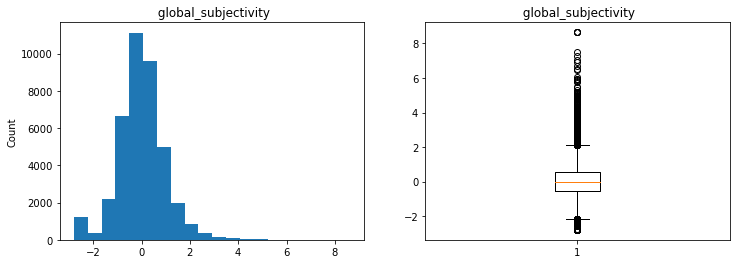

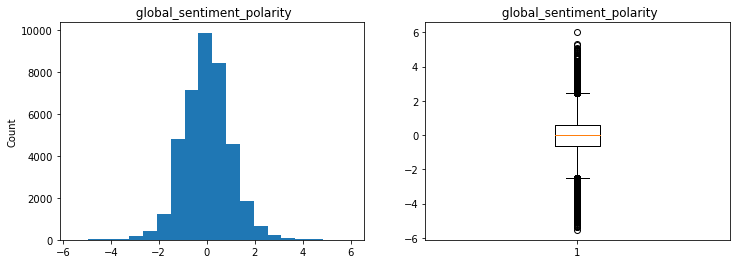

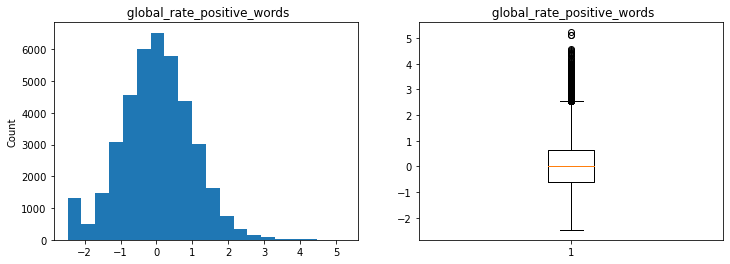

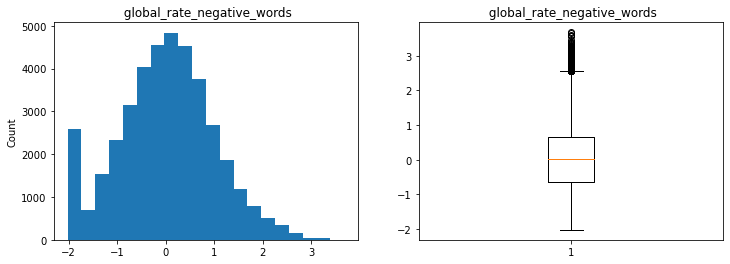

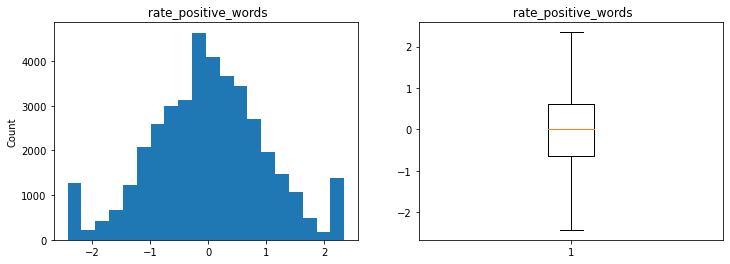

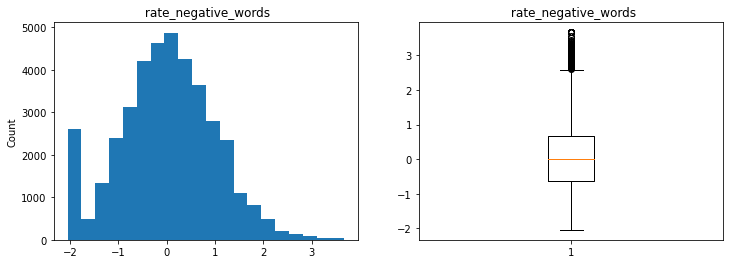

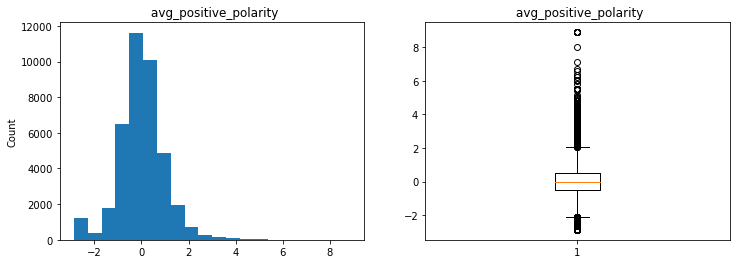

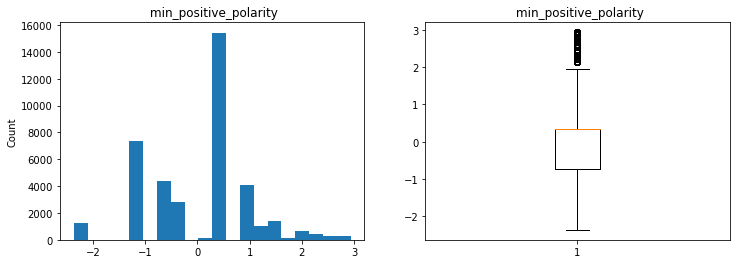

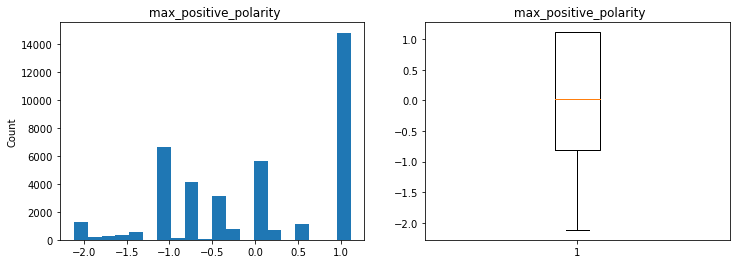

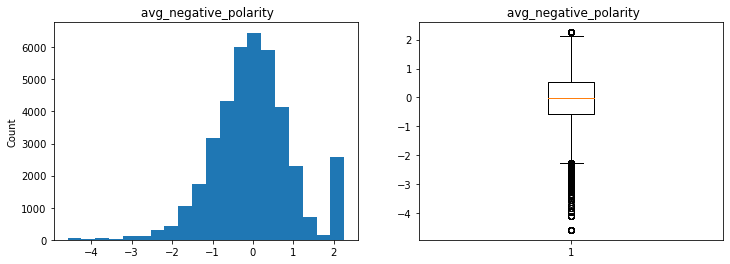

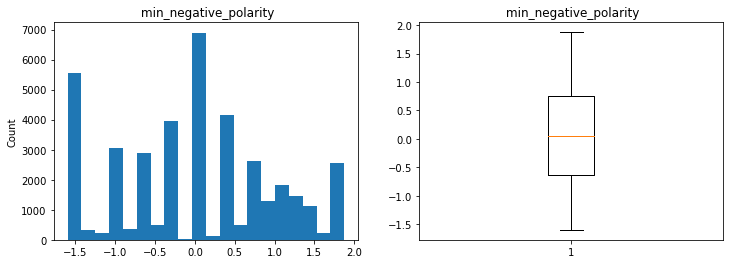

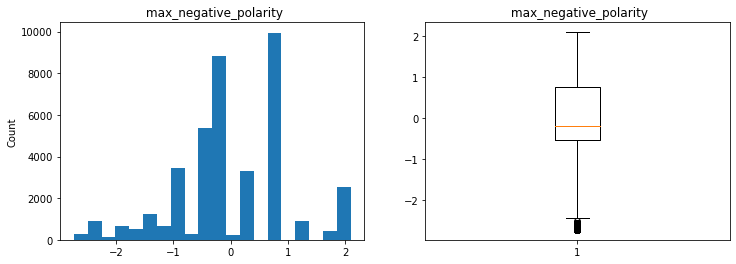

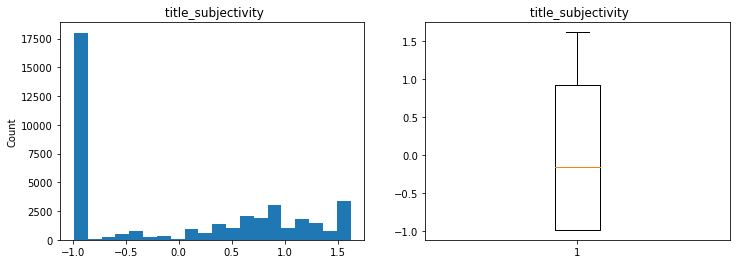

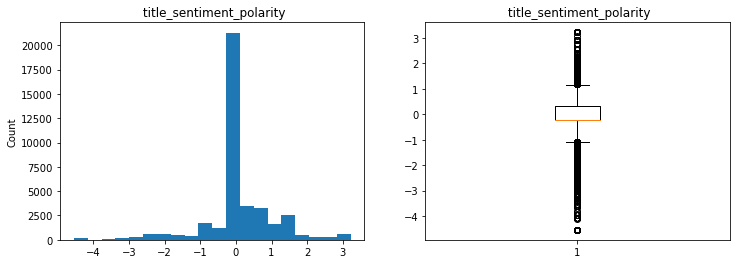

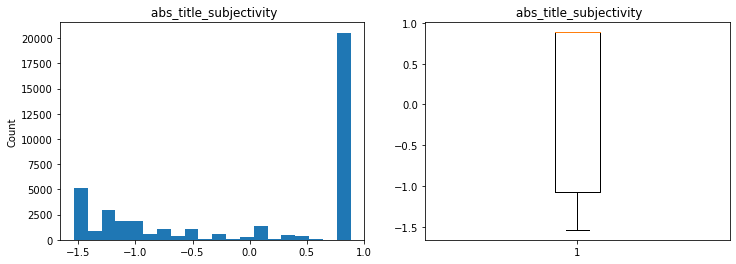

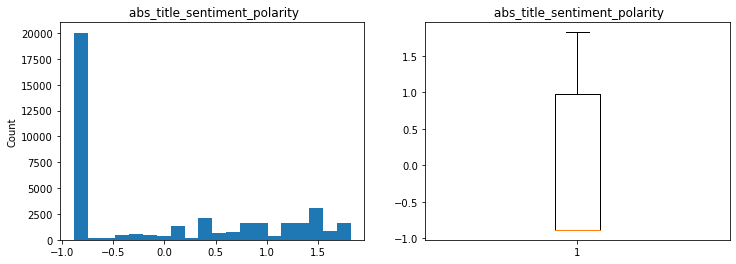

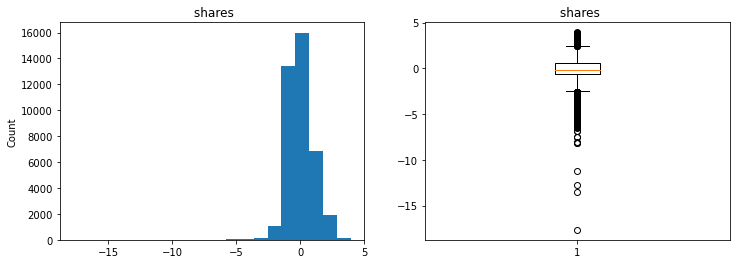

In [28]:
# plotting histogram and boxplot side by side
#plotting the normalized numeric variables including shares which is response variable 
for i in range(0,40):
    figure, axis = plt.subplots(1, 2,figsize=(12,4))
    a=standardized_data.iloc[:,i]
    axis[0].hist(a, bins=20)
    axis[0].set_title(standardized_data.columns[i])
    axis[0].set_ylabel("Count")
    axis[1].boxplot(a)
    axis[1].set_title(standardized_data.columns[i])
    plt.show()

It can seen that after normalization, variables which were right or left skewed are showing normal distribution including response variable which was right skewed. 

Now joining all the categorical attributes to the standardized_data for further analysis and modleing 

In [29]:
complete_data = standardized_data.join(data[data_channel1]) #using join fuction
complete_data = complete_data.join(data[day_of_publish1])
complete_data = complete_data.join(data[LDA_proximity1])
complete_data

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04
0,0.768359,-0.720956,0.861365,0.165674,0.781136,-0.693423,-0.149019,-0.290008,-0.749604,0.022536,...,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123
1,-0.644399,-0.582079,0.511983,0.165674,0.664751,-0.957425,-0.740154,-0.290008,-0.749604,0.677491,...,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001
2,-0.644399,-0.753699,0.330606,0.165674,-0.000646,-0.957425,-0.740154,-0.290008,-0.749604,-0.669620,...,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188
3,-0.644399,0.213271,-0.122812,0.165674,0.008904,0.153481,-1.767673,-0.290008,-0.749604,-0.644056,...,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572
4,1.216605,1.214913,-0.718135,0.165674,-0.691796,1.042550,2.522405,1.660464,-0.749604,0.029020,...,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.309590,-0.277999,0.040511,0.165674,0.111594,0.153481,1.251290,-0.290008,1.062406,-0.371357,...,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260
39640,0.768359,-0.333828,1.049465,0.165674,1.118071,0.153481,1.251290,0.558841,1.944837,-0.642740,...,0.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575
39641,-0.160861,-0.007013,-0.041182,0.165674,-0.107914,1.338081,-0.740154,1.436243,1.062406,1.189318,...,0.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970
39642,-2.193336,0.539768,0.107113,0.165674,0.153491,0.273184,-0.740154,-0.290008,-0.749604,0.864498,...,0.0,0.0,0.0,0.0,0.0,0.040004,0.040003,0.839987,0.040002,0.040004


Now this is now complete data after analysis and cleaning which can used for further work 

### Feature Selection / Dimensionality Reduction 

Principal Component Analysis

In [30]:
# importing required libraries
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection

[1.64986778e-01 1.04312894e-01 9.01550340e-02 7.10063142e-02
 6.56161758e-02 6.20921504e-02 5.40749834e-02 4.30245122e-02
 3.45453676e-02 3.03582098e-02 2.86401373e-02 2.46820673e-02
 2.28510298e-02 2.18524466e-02 2.07767479e-02 1.94281088e-02
 1.77010424e-02 1.50318282e-02 1.41910421e-02 1.31619616e-02
 1.17974626e-02 9.16583486e-03 8.85871742e-03 8.25630330e-03
 7.75562433e-03 7.28541082e-03 5.95336647e-03 4.69228388e-03
 3.92419940e-03 3.54736127e-03 2.88966469e-03 1.87486578e-03
 1.66364924e-03 1.28748725e-03 9.36442038e-04 7.63502420e-04
 3.75123202e-04 2.96657773e-04 1.01995119e-04 8.52170030e-05]


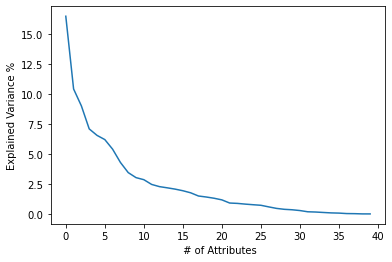

In [31]:
df0 = standardized_data[numericsc]
df1 =standardized_data[shares1]

# assigning the explanatory and response variables 
X = df0
y = df1

# splitting the data into training + testing subsets 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=0)

# create an instance of a PCA model
pca = PCA()

# apply the PCA function to the training data
pca.fit(X_train)

# display and plot the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance %')
plt.xlabel(' # of Attributes')
plt.plot(100*pca.explained_variance_ratio_)
plt.show()

In [32]:
# calculating how many attributes required to explain 95% of total variance 
attributes = 0
threshold = 0.95 #variance
for i in range(len(pca.explained_variance_ratio_)):
    attributes += pca.explained_variance_ratio_[i]
    if attributes > threshold:
        print(str(i) + ' attributes required to explain 95% of total variance.')
        break

23 attributes required to explain 95% of total variance.


In [33]:
pca2 = PCA(23)
reduced_data = pca2.fit_transform(X) #new array with only 23 attributes 
reduced_data.shape 

(39644, 23)

Hence we have only 23 attributes instead of 60 which are required for model. 

### Regression Model Evaluation

In [34]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

Model 1: With all the variables/attributes

In [50]:
new_X_train = complete_data
new_X_train, new_X_test, y_train, y_test = model_selection.train_test_split(new_X_train, y, test_size=0.4, random_state=0)

In [51]:
model = LinearRegression() #parameter for cross validation model

# fit the model using 5-fold cross validation 

scores = cross_val_score(model, new_X_train, y_train, cv=5)

# printing the R^2 metrics derived from the K-fold cross validation of this linear regression model
print (scores)

[1. 1. 1. 1. 1.]


In [52]:
# calculating the average R^2 across all 5 folds
np.mean(scores)

1.0

Model 2: With only 23 features

In [59]:
reduced_X_train = reduced_data 
reduced_X_train, reduced_X_test, y_train, y_test = model_selection.train_test_split(reduced_X_train, y, test_size=0.4, random_state=0)

In [60]:
model = LinearRegression() #parameter for cross validation model

# fit the model using 5-fold cross validation 

scores = cross_val_score(model, reduced_X_train, y_train, cv=5)

# printing the R^2 metrics derived from the K-fold cross validation of this linear regression model
print (scores)

[0.99918445 0.99917748 0.99917339 0.99922709 0.9991612 ]


In [61]:
# calculating the average R^2 across all 5 folds
np.mean(scores)

0.9991847224366397

Using cross validation we can see here that PCA model performs well with avg R^2 score of 0.99 which means that the data in a regression line fit the data in the sample alomst perfectly.  

### Conclusion:

Successfully completed the steps mentioned in the introduction. Imported the data then did EDA work. Followed by normalization of data then reduced the number of attributes or column from 59 to 23 using Principle component analysis (PCA), then trained and evaluated the model using K-fold cross validation technique and PCA model perfectly fits. 

### References: 

1. https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity
2. Prof. Topor's notebook
3. https://www.geeksforgeeks.org/principal-component-analysis-with-python/
4. https://www.datacamp.com/tutorial/principal-component-analysis-in-python
5. https://www.python-graph-gallery.com/heatmap/